 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [230]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [231]:
# Reading whale returns
whale_returns_csv = Path("Starter_Code/Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [232]:
# Count nulls
# YOUR CODE HERE
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [233]:
# Drop nulls
# YOUR CODE HERE
whale_ret = whale_returns.dropna()
whale_ret.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [234]:
# Reading algorithmic returns
algo_returns_csv = Path("Starter_Code/Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [235]:
# Count nulls
# YOUR CODE HERE
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [236]:
# Drop nulls
# YOUR CODE HERE
algo_ret = algo_returns.dropna()
algo_ret.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [237]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Starter_Code/Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [238]:
# Check Data Types
# YOUR CODE HERE
sp500_history.dtypes

Close    object
dtype: object

In [239]:
sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [240]:
# Fix Data Types
# YOUR CODE HERE
sp500_history['Close'] = sp500_history['Close'].str.replace("$", "")
sp500_history['Close'] = sp500_history['Close'].astype('float')
sp500_history

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [241]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_returns = sp500_history.pct_change()
sp500_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [242]:
# Drop nulls
# YOUR CODE HERE
sp500_ret = sp500_returns.dropna()
sp500_ret.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [243]:
# Rename Column
# YOUR CODE HERE
sp500_ret.rename(columns = {"Close": "SP 500"}, inplace=True)
sp500_ret.head()

C:\Users\tbrod\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,SP 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [244]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_data = pd.concat([whale_ret, algo_ret, sp500_ret], axis="columns", join="inner")
combined_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

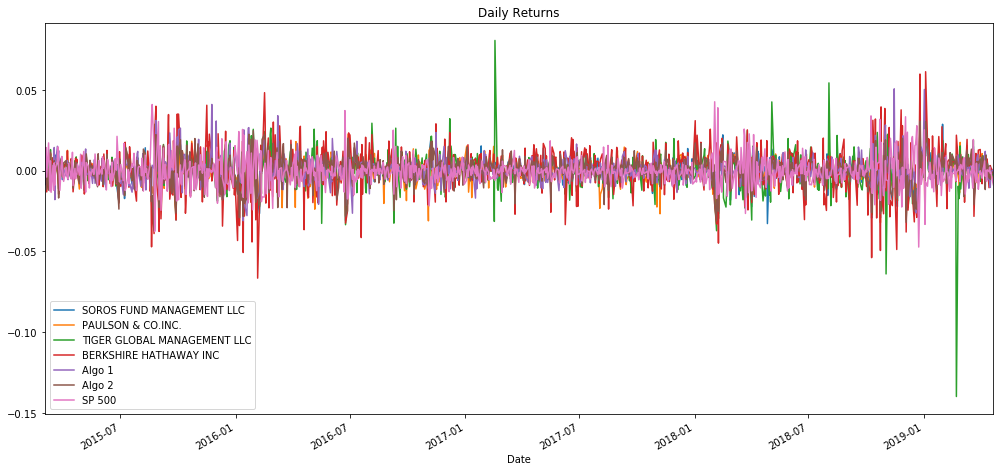

In [245]:
# Plot daily returns
# YOUR CODE HERE
combined_data.plot(figsize=(17,8), title="Daily Returns")

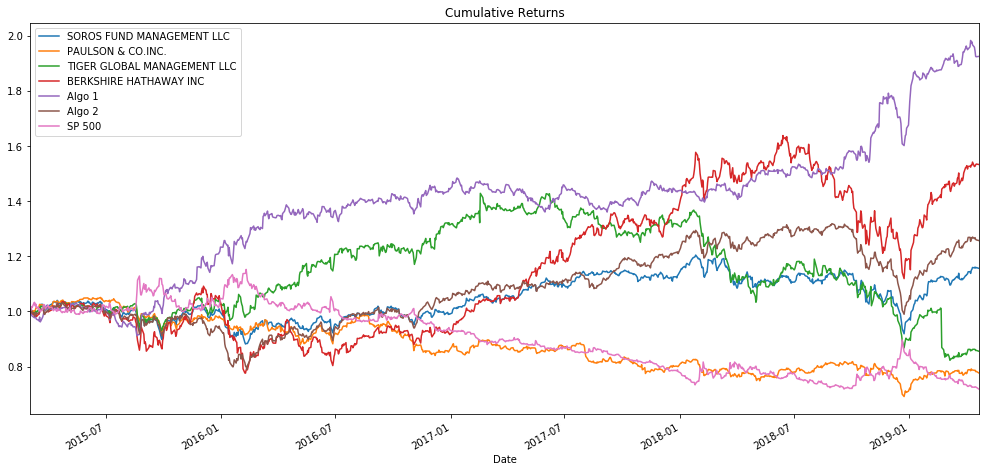

In [246]:
# Plot cumulative returns
# YOUR CODE HERE
cum_returns = (1 + combined_data).cumprod()
cum_returns.plot(figsize=(17,8), title="Cumulative Returns")

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

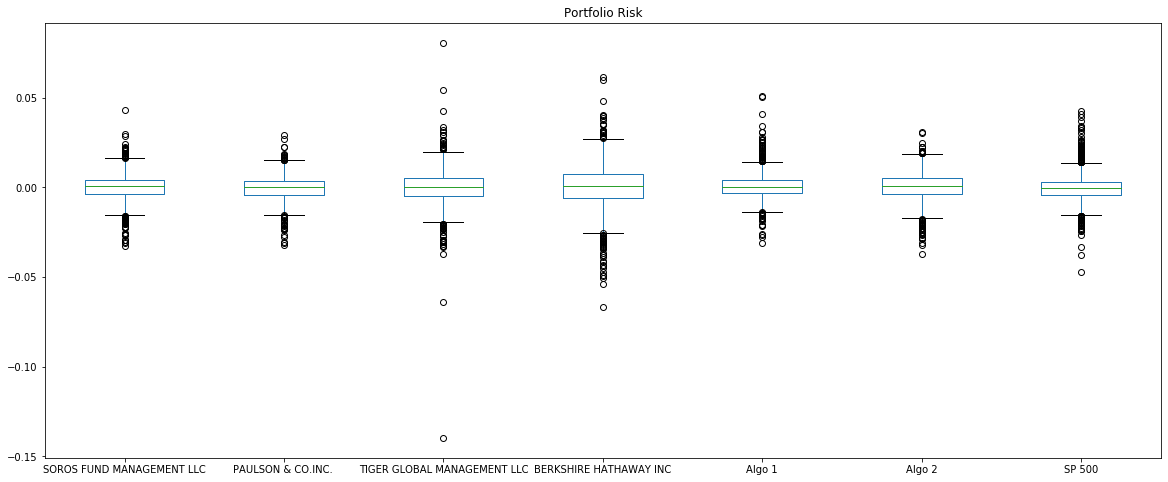

In [247]:
# Box plot to visually show risk
# YOUR CODE HERE
combined_data.plot.box(figsize=(20,8), title="Portfolio Risk")


In [248]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
daily_std = combined_data.std()
print(daily_std.sort_values(ascending=False))

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
SP 500                         0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64


In [249]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE

##Based on daily standard deviations, the Berkshire Hathaway and Tiger Global portfolios are riskier than the S&P 500. - Taylor

In [250]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = daily_std * np.sqrt(252)
annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
SP 500                         0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

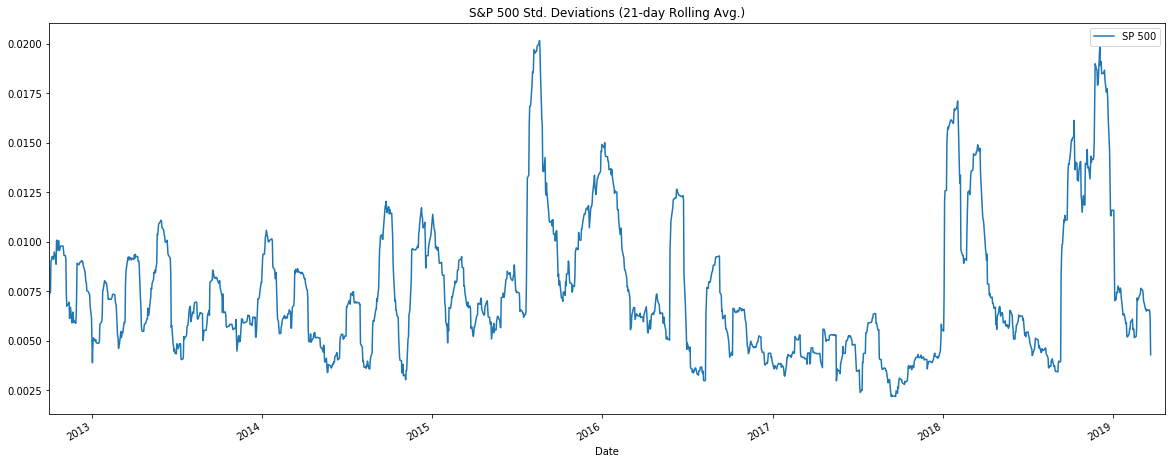

In [251]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE
sp500_ret.rolling(window=21).std().plot(figsize=(20,8), title="S&P 500 Std. Deviations (21-day Rolling Avg.)")

In [252]:
# Correlation
# YOUR CODE HERE
correlation_returns = combined_data.corr()
correlation_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


In [253]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE
covariance = combined_data["TIGER GLOBAL MANAGEMENT LLC"].cov(combined_data["SP 500"])
variance = combined_data["TIGER GLOBAL MANAGEMENT LLC"].var()
Tiger_beta = covariance / variance
Tiger_beta

-0.0011857668410015026

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [254]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [255]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (combined_data.mean() * 252) / (combined_data.std() * np.sqrt(252))
sharpe_ratios.sort_values(ascending=False)

Algo 1                         1.369589
BERKSHIRE HATHAWAY INC         0.606743
Algo 2                         0.484334
SOROS FUND MANAGEMENT LLC      0.342894
TIGER GLOBAL MANAGEMENT LLC   -0.130186
PAULSON & CO.INC.             -0.491422
SP 500                        -0.518582
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

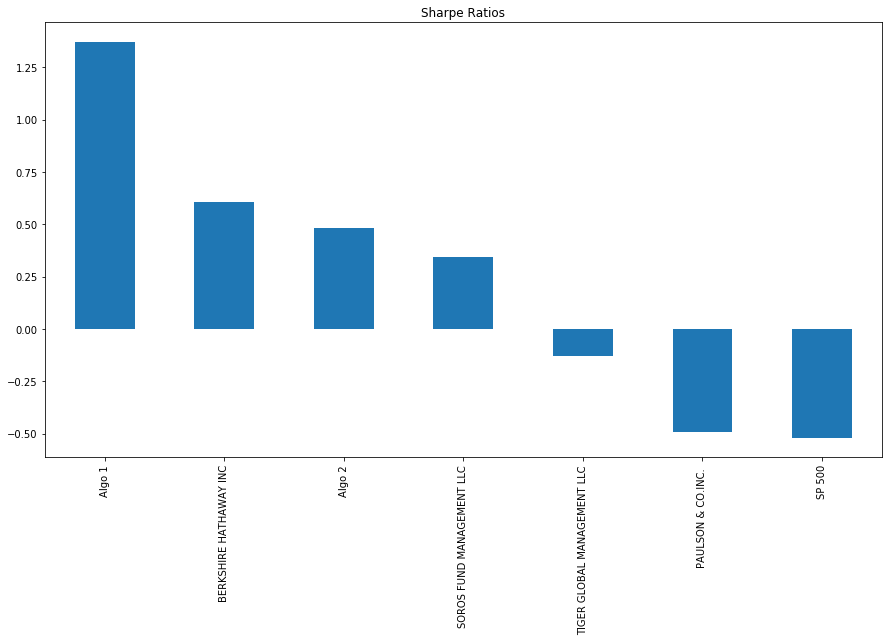

In [256]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.sort_values(ascending=False).plot.bar(figsize=(15,8), title="Sharpe Ratios")

##Based on Sharpe ratios, both algo strategies have better risk-adjusted returns than the S&P 500. However, Berkshire Hathaway
##did modestly outperform Algo 2 - Taylor

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [257]:
# Read the first stock
# YOUR CODE HERE
aapl_returns_csv = Path("Starter_Code/Resources/aapl_historical.csv")
aapl_returns = pd.read_csv(aapl_returns_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_returns.head()


,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [258]:
# Read the second stock
# YOUR CODE HERE
cost_returns_csv = Path("Starter_Code/Resources/cost_historical.csv")
cost_returns = pd.read_csv(cost_returns_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_returns.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [259]:
# Read the third stock
# YOUR CODE HERE
goog_returns_csv = Path("Starter_Code/Resources/goog_historical.csv")
goog_returns = pd.read_csv(goog_returns_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_returns.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [260]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
custom_portfolio = pd.concat([aapl_returns, cost_returns, goog_returns], axis="rows", join="inner")
custom_portfolio

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75
...,...,...
2018-05-17,GOOG,1078.59
2018-05-16,GOOG,1081.77
2018-05-15,GOOG,1079.23


In [261]:
# Reset the index
# YOUR CODE HERE
custom_portfolio = custom_portfolio.reset_index()
custom_portfolio = custom_portfolio.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
custom_portfolio.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [262]:
# Drop Nulls
# YOUR CODE HERE
custom_portfolio = custom_portfolio.dropna()
custom_portfolio.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [263]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]

# YOUR CODE HERE
custom_returns = custom_portfolio.pct_change()
cust_returns = custom_returns.dot(weights)
cust_returns.head()

Trade DATE
2018-05-11         NaN
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [264]:
# YOUR CODE HERE
all_portfolios = pd.concat([combined_data, cust_returns], axis="columns", join="inner")
all_portfolios.columns = ['Soros Fund Mgmt', 'Paulson', 'Tiger Global', 'Berkshire Hathaway', 'Algo 1', 'Algo 2', 'S&P 500', 'Custom Port.']
all_portfolios.head()

,Soros Fund Mgmt,Paulson,Tiger Global,Berkshire Hathaway,Algo 1,Algo 2,S&P 500,Custom Port.
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,NaN
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.001595


In [265]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
all_portfolios.isnull()
all_portfolios.dropna(inplace=True)
all_portfolios

,Soros Fund Mgmt,Paulson,Tiger Global,Berkshire Hathaway,Algo 1,Algo 2,S&P 500,Custom Port.
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.007522
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,0.001545


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [266]:
# Risk
# YOUR CODE HERE
all_portfolios_ann_std = all_portfolios.std() * np.sqrt(252)
annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
SP 500                         0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

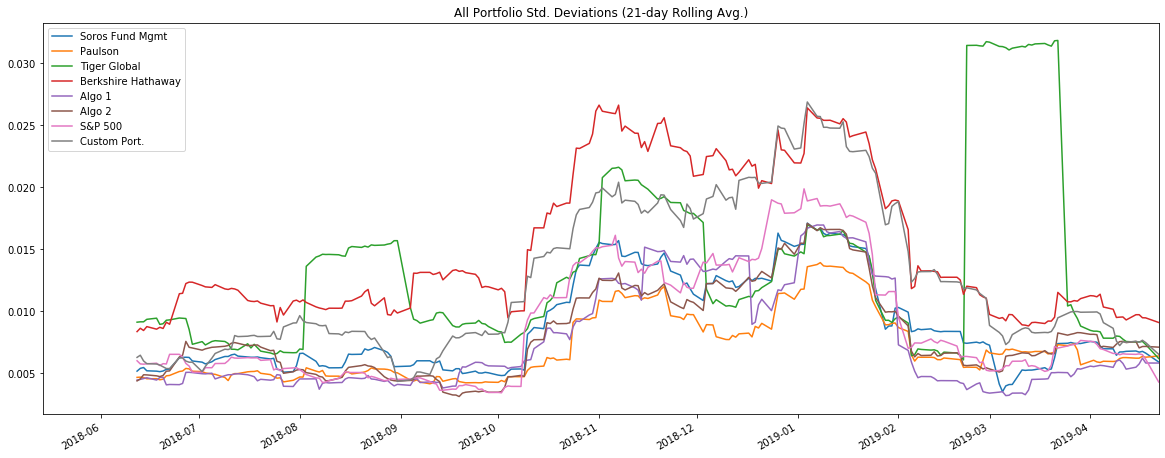

In [267]:
# Rolling
# YOUR CODE HERE
all_portfolios.rolling(window=21).std().plot(figsize=(20,8), title="All Portfolio Std. Deviations (21-day Rolling Avg.)")

In [268]:
# Beta
# YOUR CODE HERE
tot_covariance = all_portfolios["Custom Port."].cov(all_portfolios["S&P 500"])
tot_variance = all_portfolios["Custom Port."].var()
cust_portfolio_beta = tot_covariance / tot_variance
cust_portfolio_beta

0.0040370539875284025

In [269]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
tot_sharpe_ratios = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))
tot_sharpe_ratios.sort_values(ascending=False)

Algo 1                2.001260
Custom Port.          0.876152
Soros Fund Mgmt       0.380007
Paulson               0.227577
Berkshire Hathaway    0.103006
Algo 2                0.007334
S&P 500              -0.427676
Tiger Global         -1.066635
dtype: float64

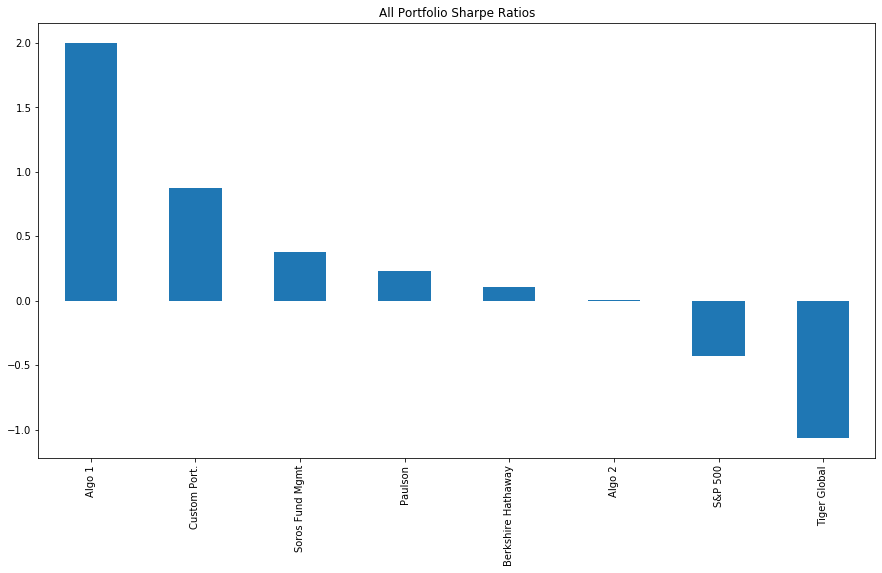

In [270]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
tot_sharpe_ratios.sort_values(ascending=False).plot.bar(figsize=(15,8), title="All Portfolio Sharpe Ratios")

## Include correlation analysis to determine which stocks (if any) are correlated

In [271]:
# YOUR CODE HERE
all_portfolios.corr()

,Soros Fund Mgmt,Paulson,Tiger Global,Berkshire Hathaway,Algo 1,Algo 2,S&P 500,Custom Port.
Soros Fund Mgmt,1.000000,0.791802,0.477844,0.816197,0.336909,0.862583,-0.028256,0.732548
Paulson,0.791802,1.000000,0.484869,0.650390,0.360727,0.783865,-0.059862,0.643828
Tiger Global,0.477844,0.484869,1.000000,0.324306,0.113671,0.408402,0.005881,0.390961
Berkshire Hathaway,0.816197,0.650390,0.324306,1.000000,0.325985,0.782054,-0.038832,0.800558
Algo 1,0.336909,0.360727,0.113671,0.325985,1.000000,0.364457,-0.054478,0.260331
Algo 2,0.862583,0.783865,0.408402,0.782054,0.364457,1.000000,-0.042540,0.739020
S&P 500,-0.028256,-0.059862,0.005881,-0.038832,-0.054478,-0.042540,1.000000,0.005603
Custom Port.,0.732548,0.643828,0.390961,0.800558,0.260331,0.739020,0.005603,1.000000


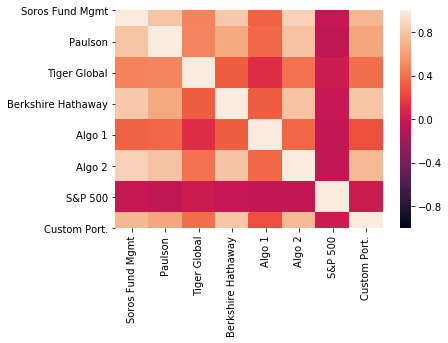

In [272]:
port_correlation = all_portfolios.corr()
sns.heatmap(port_correlation, vmin=-1, vmax=1)

In [ ]:
## While none of these portfolios look correlated to the S&P 500, our custom porfolio is most correlated to Berkshire Hathaway, Soros and Algo 2. 
## Algo 1 appears to be uncorrelated with the other portfolios but there is much stronger correlation detected between Algo 2 and some of the large
## hedge funds and our custom portfolio. Given the extremely low Sharpe ratio of Tiger Global, we can infer Tiger Global made some differentiated, 
## but poor investment choices in the beginning of 1Q19 that produced sub-optimal returns. Given the market rebounded sharply then after a 
## significant decline in 4Q18, it is probably Tiger Global pressed some short positions and had these shorts "blow out" in 1Q19.